In [125]:
import numpy as np
import keras
import scipy
import os
from IPython.display import Audio
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import random
import pylab
import wave
import sounddevice as sd
import scipy.io.wavfile as wavf

OUTPUT_DIR = "data/synthesized"

In [57]:
data_dir = os.walk("data/background")
for i in data_dir:
    folders = i[1]
    break
background_noise_files = []
files = []
for i in folders:
    folder_path = os.path.join("data/background", i)
    for f in os.listdir(folder_path):
        files.append(os.path.join(folder_path, f))

In [109]:
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    print(frame_rate)
    x = pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
    return x[0]
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()5000
    return sound_info, frame_rate

In [202]:
def get_random_startpoint_in_clip(clip):
    clip_length = len(clip)
    start_point = random.randint(0, clip_length - 10 * 1000)
    return start_point

def create_random_audio(audio_files, file_name):
    file_id = random.randint(0, len(au5000dio_files))
    
    background_noise = AudioSegment.from_wav(files[file_id])
    background_noise = background_noise.set_frame_rate(44100)
    start_point = get_random_startpoint_in_clip(background_noise)
    
    background_noise[start_point: start_point + (10 * 1000)].export(file_name, format="wav")
    
create_random_audio(files, "data/test.wav")
Audio("data/test.wav")

/home/stig/PycharmProjects/triggerword/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/home/stig/PycharmProjects/triggerword/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


44100
(129, 3444)


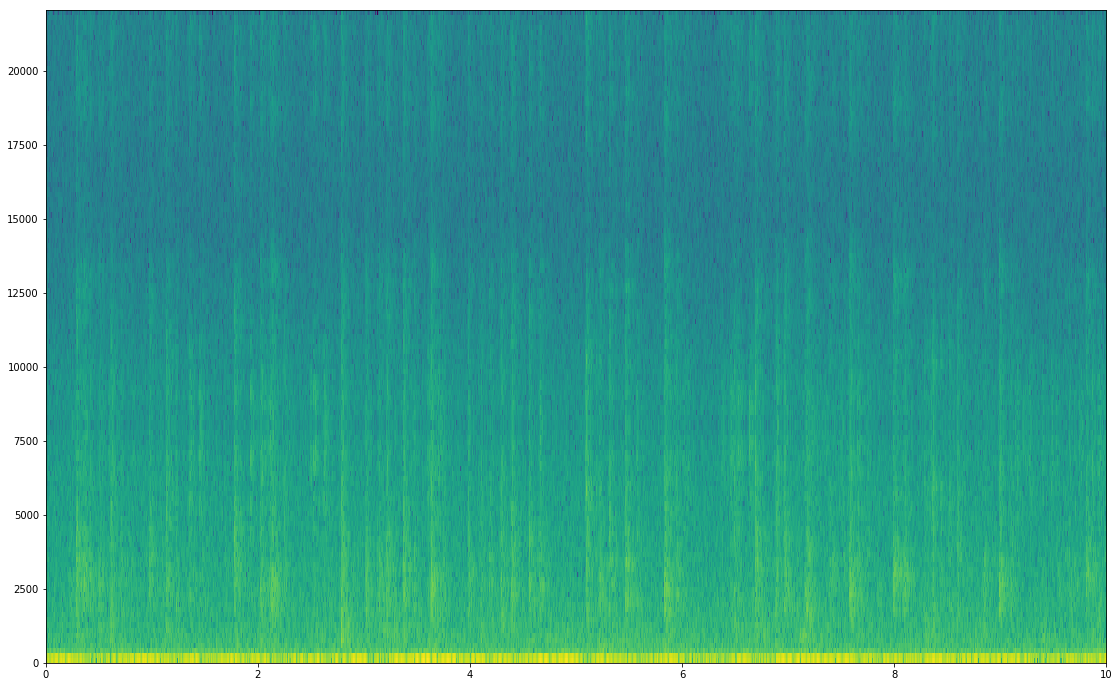

In [111]:
spec = graph_spectrogram("data/test.wav")
print(np.shape(spec))

In [171]:
def record_sound(filename):
    duration = 1.5  # seconds
    fs = 44100
    myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2, blocking=True)
    wavf.write(filename, fs, myrecording)tr(i)tr(i)
    return myrecording
i = 0

In [198]:
i += 1

record_sound("data/voices/neg%d.wav" % i)


array([[-0.01837158, -0.00283813],
       [-0.01504517, -0.00305176],
       [-0.01126099, -0.00354004],
       ...,
       [ 0.00140381, -0.00183105],
       [ 0.0017395 , -0.00222778],
       [ 0.00201416, -0.00210571]], dtype=float32)

In [209]:
create_random_audio(files, "data/test.wav")
voice = AudioSegment.from_file("data/voices/pos5.wav")
back = AudioSegment.from_file("data/test.wav")
res = back.overlay(voice, position=5000)
res.export("data/test_overlay.wav", format="wav")
Audio("data/test_overlay.wav")